# Sequence Modelling

<!--<badge>--><a href="https://colab.research.google.com/github/TheAIDojo/Machine_Learning_Bootcamp/blob/main/Week 07 - Sequence Modeling/1- Sequence_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->




Machine learning models that input or output data sequences are known as sequence models. Text streams, audio clips, video clips, time-series data, and other types of sequential data are examples of sequential data.

## Sequence Model Applications 




* **Speech Recognition:** In speech recognition, an audio clip is given as an input and then the model has to generate its text transcript. Here both the input and output are sequences of data.


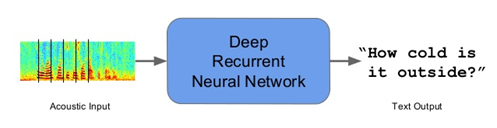

* **Sentiment Classification:** In sentiment classification opinions expressed in a piece of text is categorized. Here the input is a sequence of words.

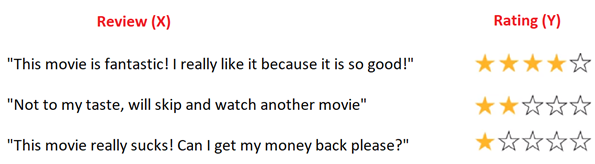

*  **Video Activity Recognition:** In video activity recognition, the model needs to identify the activity in a video clip. A video clip is a sequence of video frames, therefore in case of video activity recognition input is a sequence of data.

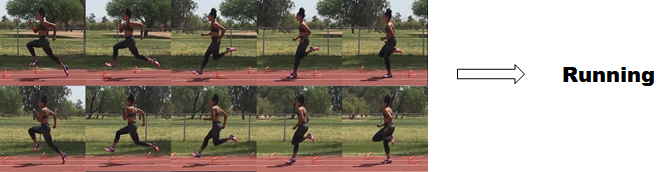

* **Text Generation:** is a subfield of natural language processing (NLP). It leverages knowledge in computational linguistics and artificial intelligence to automatically generate natural language texts, which can satisfy certain communicative requirements.
ex:

        قلبي الاسى خمره وقلبي الاناء انا جرح يمشي على قدميه وخيولي قد هدها الاعياء

* **Text Similarity:** is used to discover the most similar texts. It used to discover similar documents such as finding documents on any search engine such as Google. We can also use text similarity in document recommendations.


* **Machine Translation:** is the task of automatically converting source text in one language to text in another language. In a machine translation task, the input already consists of a sequence of symbols in some language, and the computer program must convert this into a sequence of symbols in another language.

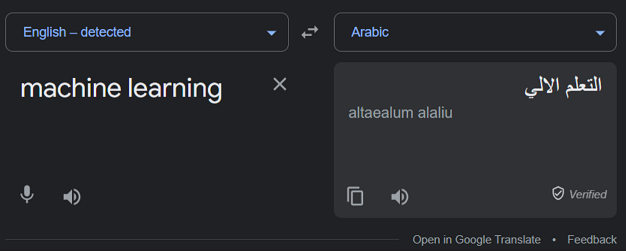

* **Forecasting:** is the process of making predictions based on past and present data. Later these can be compared against what happens. For example, a company might estimate their revenue in the next year, then compare it against the actual results.

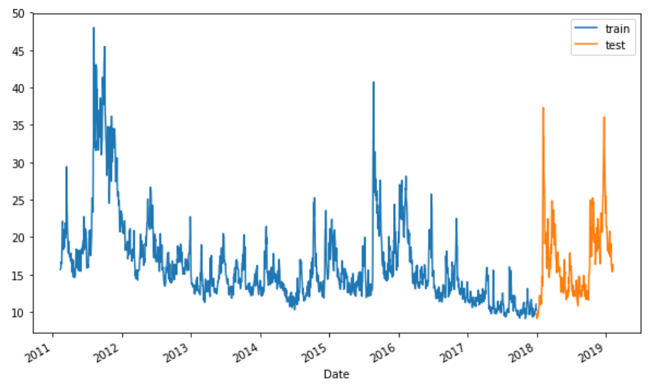

## Recurrent Neural Networks


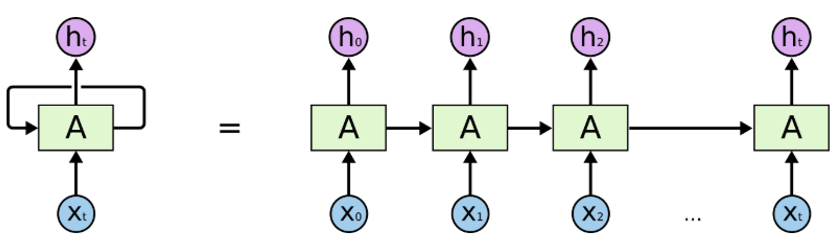



A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. Derived from feedforward neural networks, RNNs can use their internal state (memory) to process variable length sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition.

**concepts of Recurrent Neural Networks:**
* They make use of sequential information.
* They have a memory that captures what have been calculated so far, i.e. what I spoke last will impact what I will speak next.
* RNNs are ideal for text and speech analysis.

### RNN Architectures
1. One to Many Architecture: Image captioning is one good example of this architecture. In image captioning, it takes one image and then outputs a sequence of words. Here there is only one input but many outputs.

2. Many to One Architecture: Sentiment classification is one good example of this architecture. In sentiment classification, a given sentence is classified as positive or negative. In this case, the input is a sequence of words and output is a binary classification.

3. Many to Many Architecture: There are two cases in many to many architectures,

    * The first type is when the input length equals to the output length. Name entity recognition is one good example where the number of words in the input sequence is equal to the number of words in the output sequence.

    * The second type of many to many architecture is when input length does not equal to the output length. Machine translation is one good scenario for this architecture. In machine translation, RNN reads a sentence in one language and then converts it to another language. Here input length and output length are different.

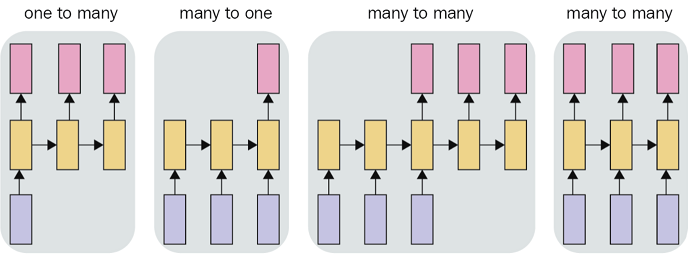

### RNN Block 

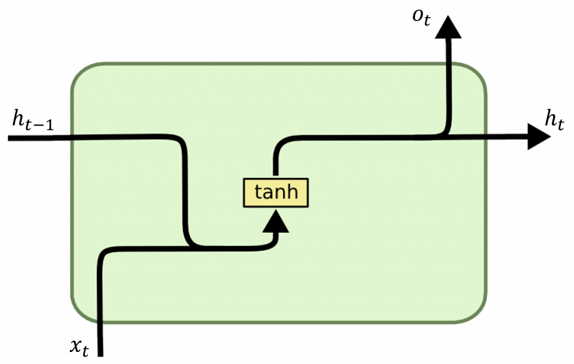

An RNN works like this; First words get transformed into machine-readable vectors. Then the RNN processes the sequence of vectors one by one.


While processing, it passes the previous hidden state to the next step of the sequence. The hidden state acts as the neural networks memory. It holds information on previous data the network has seen before.

Let’s look at a cell of the RNN to see how you would calculate the hidden state. First, the input and previous hidden state are combined to form a vector. That vector now has information on the current input and previous inputs. The vector goes through the tanh activation, and the output is the new hidden state, or the memory of the network.


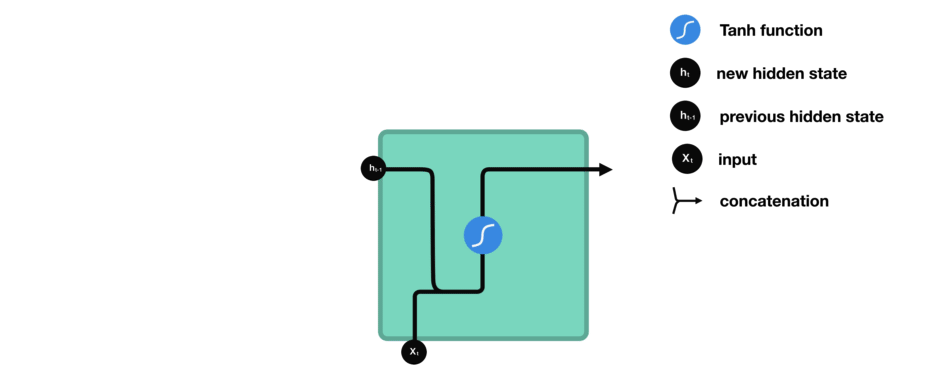

### Tanh activation
The tanh activation is used to help regulate the values flowing through the network. The tanh function squishes values to always be between -1 and 1.

When vectors are flowing through a neural network, it undergoes many transformations due to various math operations. So imagine a value that continues to be multiplied by let’s say 3. You can see how some values can explode and become astronomical, causing other values to seem insignificant.

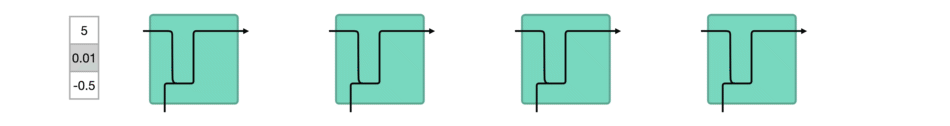

A tanh function ensures that the values stay between -1 and 1, thus regulating the output of the neural network. You can see how the same values from above remain between the boundaries allowed by the tanh function.


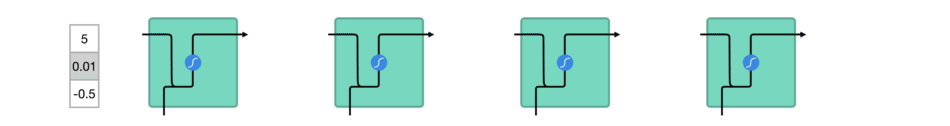

## Sentiment Analysis

Sentiment analysis is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information.

Keras API provides easy implementation for RNN layers, we'll go over them as we train a model for sentiment analysis.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
import re

# We'll import the layers directly for easier model definition
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

In [ ]:
# Below are some parameters that we'll set up now, don't worry about it for now

vocab_size = 8000
max_sequence = 128
embeddings_dims = 100

### Download Data From Kaggle

We'll be downloading the dataset from Kaggle, this requires using their download API, we'll go over the steps to do it.

First we'll be uploading `kaggle.json` into the '~\.kaggle` directory that we'll be creating, this will enable us to download datasets directly from Kaggle, more info on the process can be found here: https://github.com/Kaggle/kaggle-api 

In [ ]:
# First we'll create a new folder to put kaggle.json into
!mkdir /root/.kaggle

# Let's confirm that the directory is created
!cd /root/ && ls -la

mkdir: cannot create directory ‘/root/.kaggle’: File exists
total 64
drwx------ 1 root root 4096 Feb 21 08:24 .
drwxr-xr-x 1 root root 4096 Feb 21 08:19 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Feb 17 14:14 .cache
drwxr-xr-x 1 root root 4096 Feb 17 14:12 .config
drwxr-xr-x 3 root root 4096 Feb 11 16:58 .gsutil
drwxr-xr-x 5 root root 4096 Feb 17 14:12 .ipython
drwx------ 2 root root 4096 Feb 17 14:12 .jupyter
drwxr-xr-x 2 root root 4096 Feb 21 08:24 .kaggle
drwxr-xr-x 2 root root 4096 Feb 21 08:19 .keras
drwx------ 1 root root 4096 Feb 17 14:12 .local
drwxr-xr-x 4 root root 4096 Feb 17 14:12 .npm
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf


Now that `.kaggle` directory is all set up, we'll need to upload the `kaggle.json` file. For this you'll need a Kaggle account, you can obtain the file from this url `https://www.kaggle.com/<username>/account` (make sure to replace <username> with your actual username).

More info here: https://github.com/Kaggle/kaggle-api

In [ ]:
# Import colab's files module
from google.colab import files

# Start the upload, this will open the upload prompt below
uploaded = files.upload()

# Confirm that we've uploaded the kaggle.json file
print("Uploaded File:", list(uploaded.keys())[0])

Saving kaggle.json to kaggle.json
Uploaded File: kaggle.json


Now that we have the `kaggle.json` file uploaded, we'll need to move it to `.kaggle` directory. 

In [ ]:
# Move kaggle.json to .kaggle directory
!cp kaggle.json /root/.kaggle/kaggle.json

# Change file permission to allow python to access it
!chmod 600 /root/.kaggle/kaggle.json



And finally, we can download the dataset directly from kaggle using their Python API command (note that you may need to run `!pip install kaggle`)

If MNIST is the “hello world” of computer vision, then the IMDb reviews dataset is
the “hello world” of natural language processing: it consists of 50,000 movie reviews
in English (25,000 for training, 25,000 for testing) extracted from the famous Internet
Movie Database, along with a simple binary target for each review indicating whether
it is negative (0) or positive (1).

Now, let's unzip the downloaded file

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 74% 19.0M/25.7M [00:00<00:00, 84.5MB/s]
100% 25.7M/25.7M [00:00<00:00, 82.7MB/s]


In [ ]:
!unzip imdb-dataset-of-50k-movie-reviews.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


### Load & Preprocess Data

First, we'll load the extracted csv file into a dataframe to examine the content.

In [ ]:
df = pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
# The text needs to be cleaned
df.review[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

#### Clean Text using RE 
A regular expression (or RE) specifies a set of strings that matches it; the functions in this module let you check if a particular string matches a given regular expression (or if a given regular expression matches a particular string, which comes down to the same thing).

In [ ]:
# Function to clean the text
def clean_text(text):
    """Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers."""
    text = text.lower()
    text = re.sub("-", " ", text)
    text = re.sub('"', " ", text)
    text = re.sub("\[.*?\]", "", text)
    text = re.sub("https?://\S+|www\.\S+", "", text)
    text = re.sub("<.*?>+", "", text)
    text = re.sub("\n", "", text)
    text = re.sub("\w*\d\w*", "", text)
    text = " ".join(filter(lambda x: x[0] != "@", text.split()))
    return text


df["review"] = df.review.apply(clean_text)
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,petter mattei's love in the time of money is a...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [ ]:
# Clean text
df.review[1]

"a wonderful little production. the filming technique is very unassuming very old time bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master's of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell's murals decorating every surface) are terribly well done."

We can see that we have two columns, the review which has the review text that will be used as the input for the model, and sentiment, which is what the model will try to predict, let's split them into X's and y's  

In [ ]:
x = df.review
y = df.sentiment

x.shape, y.shape

((50000,), (50000,))

#### Tokenization

Since we know that neural network don't work with text, we'll need a way to prepare the review text to be consumed by the network.

Keras provides APIs for preparing text that can be fit and reused to prepare multiple text documents. This may be the preferred approach for large projects.

We'll first use the `Tokenizer` class from `tf.keras.preprocessing.text` module to convert tokens (i.e. words, symbols, numbers...etc.) into numbers that can be consumed by neural networks.

You can read the documentation of the `Tokenizer` class here: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=vocab_size,  # Maximum number of tokens to include, we'll use vocab_size that we defined earlier
    oov_token="<OOV>",  # A token that will replace words that will not be in the limited vocabulary set by vocab_size
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',  # Symbols that will be removed from the texts
)

# Now we will train the tokenizer on our datasets, this allows the tokenizer to learn the most frequent words and create an index for them

tokenizer.fit_on_texts(x)

Now we can use the tokenizer to convert texts into sequences of numbers (each token/word has its own unique index)

In [ ]:
tokenizer.word_index

In [ ]:
x_tokenized = tokenizer.texts_to_sequences(x)

# Let's print s string before and after tokenization and examine the differences
print(x[1])
print(x_tokenized[1])

a wonderful little production. the filming technique is very unassuming very old time bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master's of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell's murals decorating every surface) are terribly well done.
[4, 390, 120, 349, 2, 1371, 2946, 7, 52, 

#### Padding Sequences

Let's look at the lengths of the different tokenized reviews



In [ ]:
print("Length of Review 1:", len(x_tokenized[0]))
print("Length of Review 10:", len(x_tokenized[9]))
print("Length of Review 1000:", len(x_tokenized[999]))

Length of Review 1: 307
Length of Review 10: 32
Length of Review 1000: 572


We can see that each tokenized review has different length. And since these tokenized reviews will be used as input to the model (which needs to be of a fixed shape), then clearly this won't work, an extra preprocessing step is required called `pad_sequences` available at `tf.keras.preprocessing.sequence`, this function will ensure that sequences are of same length by either clipping the sequence or padding it with zeros. 

In [ ]:
x_padded = tf.keras.preprocessing.sequence.pad_sequences(
    x_tokenized,  # The sequences that will be padded/clipped
    maxlen=max_sequence,  # The maximum length of the sequence using max_sequence that's defined earlier
    padding="post",  # Where we'll add zeros if sequence length is shorter that the maximum length, this will add zeros to the end of the sentence
)

# Let's print out the length of some padded sequences
print("Length of Review 1:", len(x_padded[0]))
print("Length of Review 10:", len(x_padded[9]))
print("Length of Review 1000:", len(x_padded[999]))

Length of Review 1: 128
Length of Review 10: 128
Length of Review 1000: 128


#### Preprocess Targets
Now that the inputs are all setup, let's work on the targets. Specifically, let's change posative/negative into 1/0.

In [ ]:
y.replace({"positive": 1, "negative": 0}, inplace=True)
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

### Train/Test Split
Now that everything is setup, all we need to do is creating our training/testing split using Scikit Learn's `model_selection.train_test_split`.

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_padded, y, test_size=0.05, random_state=42, stratify=y
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((47500, 128), (47500,), (2500, 128), (2500,))

### Create TF Data Pipeline

In [ ]:
def dataset_creator(x, y):
    data = tf.data.Dataset.from_tensor_slices((x, y))
    data = data.shuffle(50000)
    data = data.batch(64)
    data = data.prefetch(tf.data.experimental.AUTOTUNE)
    return data


train_dataset = dataset_creator(x_train, y_train)
test_dataset = dataset_creator(x_test, y_test)

### Models


#### Fully Connected Neural Network Model

We'll be training a fully connected network, since we know that Dense layers don't work well with sequence data, we can assume that this model will perform poorly.

In [ ]:
model_fcnn = tf.keras.Sequential(
    [
        tf.keras.layers.Input(
            [max_sequence]
        ),  # Input shape is equal to the padded sequences maximum length (i.e. max_sequence)
        tf.keras.layers.Dense(units=128, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

model_fcnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,641
Trainable params: 16,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_fcnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model_fcnn.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
743/743 [==============================] - 7s 5ms/step - loss: 81.9639 - accuracy: 0.5000 - val_loss: 3.2405 - val_accuracy: 0.5024
Epoch 2/5
743/743 [==============================] - 3s 4ms/step - loss: 2.1200 - accuracy: 0.5019 - val_loss: 1.2317 - val_accuracy: 0.5168
Epoch 3/5
743/743 [==============================] - 3s 5ms/step - loss: 1.2168 - accuracy: 0.5039 - val_loss: 1.1221 - val_accuracy: 0.4892
Epoch 4/5
743/743 [==============================] - 4s 5ms/step - loss: 0.9989 - accuracy: 0.5025 - val_loss: 0.9100 - val_accuracy: 0.5004
Epoch 5/5
743/743 [==============================] - 3s 4ms/step - loss: 0.8702 - accuracy: 0.4999 - val_loss: 0.8325 - val_accuracy: 0.4832


An binary accuracy of 50% means that it's equal to a random classifier, meaning that our model isn't quite able to learn. Let's add another thing to the network that might help if perform better.

#### RNN Model 
We'll be training a RNN network, since we know that RNN work's well with sequence data, we can assume that this model will perform good.

In [ ]:
model_rnn = tf.keras.Sequential(
    [
        tf.keras.layers.Input(
            [max_sequence]
        ),  # Input shape is equal to the padded sequences maximum length (i.e. max_sequence)
        tf.keras.layers.Lambda(lambda x: tf.reshape(x, (-1, 128, 1))),
        tf.keras.layers.SimpleRNN(units=32),
        tf.keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 128, 1)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model_rnn.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
743/743 [==============================] - 116s 155ms/step - loss: 0.6947 - accuracy: 0.5103 - val_loss: 0.6929 - val_accuracy: 0.5024
Epoch 2/5
743/743 [==============================] - 114s 154ms/step - loss: 0.6934 - accuracy: 0.5112 - val_loss: 0.6929 - val_accuracy: 0.5020
Epoch 3/5
743/743 [==============================] - 111s 150ms/step - loss: 0.6929 - accuracy: 0.5129 - val_loss: 0.6923 - val_accuracy: 0.5168
Epoch 4/5
743/743 [==============================] - 111s 150ms/step - loss: 0.6933 - accuracy: 0.5116 - val_loss: 0.6916 - val_accuracy: 0.5040
Epoch 5/5
743/743 [==============================] - 113s 151ms/step - loss: 0.6931 - accuracy: 0.5124 - val_loss: 0.6933 - val_accuracy: 0.5132


##### Word Embeddings
In natural language processing, word embedding is a term used for the representation of words for text analysis, typically it's takes in words and converts them to a feature vector that can represent the word with more data points than just a single number, Word Embeddings learn the relationship between different words and provide more information on the meaning of the word.

You can read more about Word Embeddings here: https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa

`tensorflow` offers an Embedding layer that can be used for neural networks on text data. It is a flexible layer that can be used in a variety of ways, such as:

*   It can be used alone to learn a word embedding that can be saved and used in another model later.
*   It can be used as part of a deep learning model where the embedding is learned along with the model itself.
*   It can be used to load a pre-trained word embedding model, a type of transfer learning.


The `Embedding layer` is defined as the first hidden layer of a network.

It must specify 3 arguments:

`input_dim`: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.

`output_dim`: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.

`input_length`: This is the length of input sequences, as you would define for any input layer of a Keras model.
For example, if all of your input documents are comprised of 1000 words, this would be 1000.

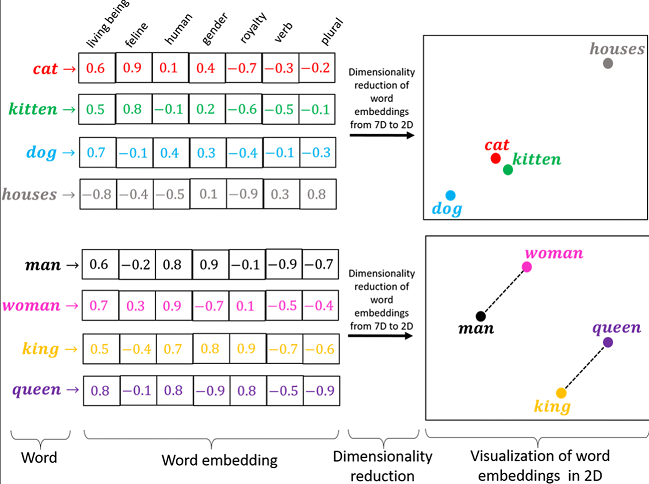

#### DNN Model with Embedded Layer

In [ ]:
model_fcnn_with_embeddings = tf.keras.Sequential(
    [
        tf.keras.layers.Input(
            [max_sequence]
        ),  # Input shape is equal to the padded sequences maximum length (i.e. max_sequence). Alternatively, this can be defined as a part of the Embedding layer
        # mask_zero is set to True to ignore the zero padding
        tf.keras.layers.Embedding(
            vocab_size + 1, 100, mask_zero=True
        ),  # Embedding layer with input dim of vocab_size + 1 (to account for paddings)
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=128, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

model_fcnn_with_embeddings.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 100)          800100    
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               1638528   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,438,757
Trainable params: 2,438,757
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_fcnn_with_embeddings.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

In [ ]:
model_fcnn_with_embeddings.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
743/743 [==============================] - 8s 10ms/step - loss: 0.3779 - accuracy: 0.8216 - val_loss: 0.3061 - val_accuracy: 0.8640
Epoch 2/5
743/743 [==============================] - 7s 9ms/step - loss: 0.1281 - accuracy: 0.9530 - val_loss: 0.4620 - val_accuracy: 0.8432
Epoch 3/5
743/743 [==============================] - 7s 9ms/step - loss: 0.0205 - accuracy: 0.9932 - val_loss: 0.6835 - val_accuracy: 0.8484
Epoch 4/5
743/743 [==============================] - 7s 10ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.8247 - val_accuracy: 0.8452
Epoch 5/5
743/743 [==============================] - 7s 10ms/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.9505 - val_accuracy: 0.8412


The inclusion of the `Embedding` layer provided the network with better word representation that allowed the model to pick up on important features and use it to classify sentiment. But the performance can still be improved once the model is able to understand sequences. 

#### Recurrent Neural Network with Embedded Layer

RNNs have an advantage over regular Dense layers, which is that they are able to hold on into sequential information during prediction, this allows RNNs to perform better than a Dense networks but it will require more training time due to the complexity of RNN layers compared to Dense layers.

In [ ]:
model_rnn = tf.keras.Sequential(
    [
        tf.keras.layers.Input(
            [max_sequence]
        ),  # Input shape is equal to the padded sequences maximum length (i.e. max_sequence). Alternatively, this can be defined as a part of the Embedding layer
        # mask_zero is set to True to ignore the zero padding
        tf.keras.layers.Embedding(
            vocab_size + 1,
            100,
            mask_zero=True,
        ),  # Embedding layer with input dim of vocab_size + 1 (to account for paddings)
        tf.keras.layers.SimpleRNN(
            100, return_sequences=True
        ),  # return the output from the rnn layer as sequence
        tf.keras.layers.SimpleRNN(64),
        tf.keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

model_rnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 128, 100)          800100    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128, 100)          20100     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                10560     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 830,825
Trainable params: 830,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model_rnn.fit(train_dataset, epochs=4, validation_data=test_dataset)

main difficulties that RNNs face:

* Unstable gradients, which can be alleviated using vari‐
ous techniques, including recurrent dropout and recurrent layer normalization
* A (very) limited short-term memory, which can be extended using LSTM and
GRU cells

#### Long Short Term Memory

Due to the transformations that the data goes through when traversing an RNN,
some information is lost at each time step. After a while, the RNN’s state contains virtually no trace of the first inputs. This can be a showstopper.
Imagine Dory the fish trying to translate a long sentence; by the time she’s finished reading it, she has no clue how it started. 
To tackle this problem, various types of cells with longterm memory have been introduced. 
They have proven so successful that the basic cells are not used much anymore.
Let’s first look at the most popular of these longterm memory cells: the `LSTM cell`.


**Long short-term memory:** is an artificial recurrent neural network architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can process not only single data points, but also entire sequences of data.

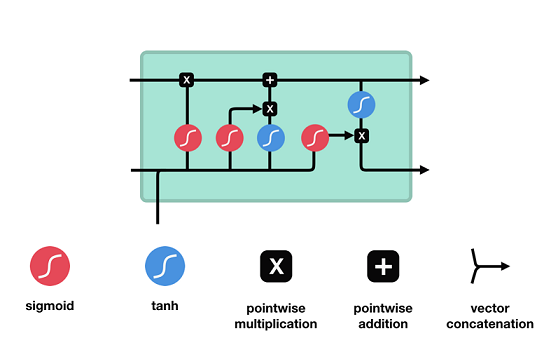

**Core Concept of LSTM**<br>
The core concept of LSTM’s are the cell state, and it’s various gates. The cell state act as a transport highway that transfers relative information all the way down the sequence chain. You can think of it as the “memory” of the network. The cell state, in theory, can carry relevant information throughout the processing of the sequence. So even information from the earlier time steps can make it’s way to later time steps, reducing the effects of short-term memory. As the cell state goes on its journey, information get’s added or removed to the cell state via gates. The gates are different neural networks that decide which information is allowed on the cell state. The gates can learn what information is relevant to keep or forget during training.

**LSTM Gates**<br>

Gates contains sigmoid activations. A sigmoid activation is similar to the tanh activation. Instead of squishing values between -1 and 1, it squishes values between 0 and 1. That is helpful to update or forget data because any number getting multiplied by 0 is 0, causing values to disappears or be “forgotten.” Any number multiplied by 1 is the same value therefore that value stay’s the same or is “kept.” The network can learn which data is not important therefore can be forgotten or which data is important to keep.

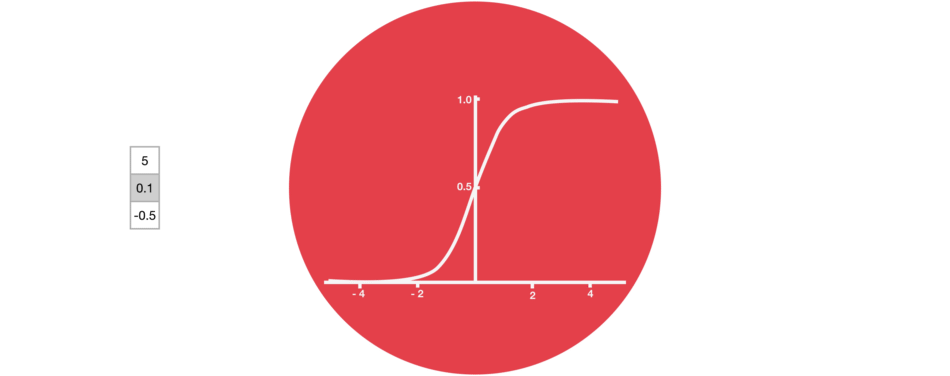

**Forget gate**<br>
First, we have the forget gate. This gate decides what information should be thrown away or kept. Information from the previous hidden state and information from the current input is passed through the sigmoid function. Values come out between 0 and 1. The closer to 0 means to forget, and the closer to 1 means to keep.

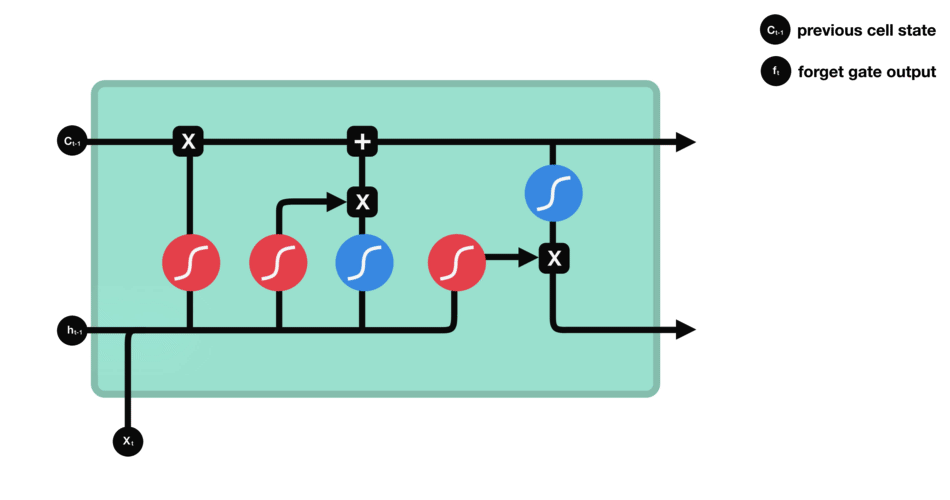

**Input Gate**<br>
To update the cell state, we have the input gate. First, we pass the previous hidden state and current input into a sigmoid function. That decides which values will be updated by transforming the values to be between 0 and 1. 0 means not important, and 1 means important. You also pass the hidden state and current input into the tanh function to squish values between -1 and 1 to help regulate the network. Then you multiply the tanh output with the sigmoid output. The sigmoid output will decide which information is important to keep from the tanh output.

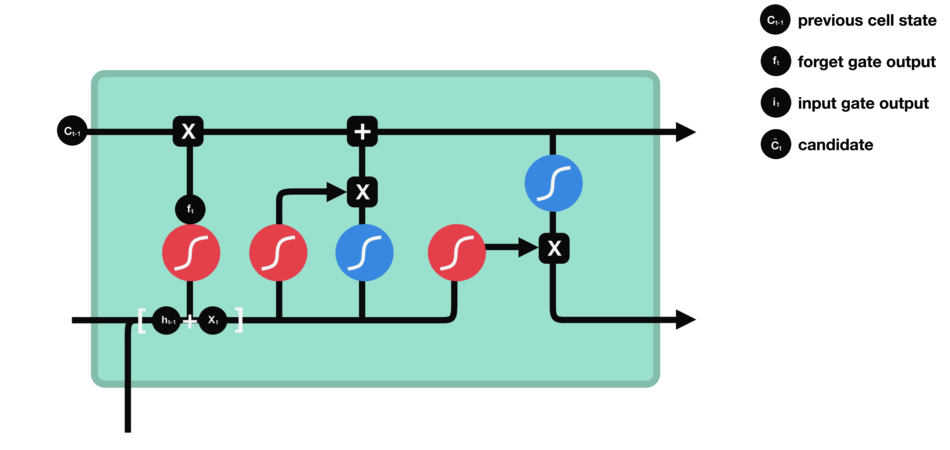


**Cell State**<br>
Now we should have enough information to calculate the cell state. First, the cell state gets pointwise multiplied by the forget vector. This has a possibility of dropping values in the cell state if it gets multiplied by values near 0. Then we take the output from the input gate and do a pointwise addition which updates the cell state to new values that the neural network finds relevant. That gives us our new cell state.


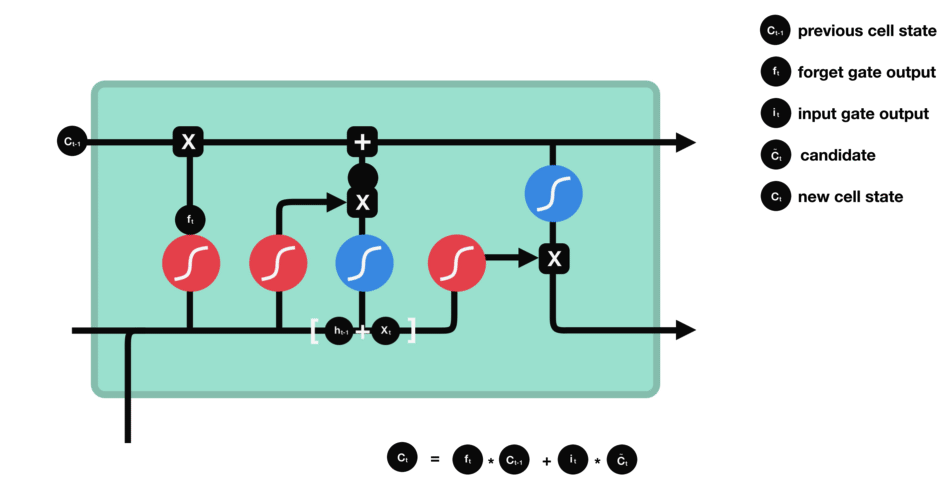

**Output Gate**<br>
Last we have the output gate. The output gate decides what the next hidden state should be. Remember that the hidden state contains information on previous inputs. The hidden state is also used for predictions. First, we pass the previous hidden state and the current input into a sigmoid function. Then we pass the newly modified cell state to the tanh function. We multiply the tanh output with the sigmoid output to decide what information the hidden state should carry. The output is the hidden state. The new cell state and the new hidden is then carried over to the next time step.

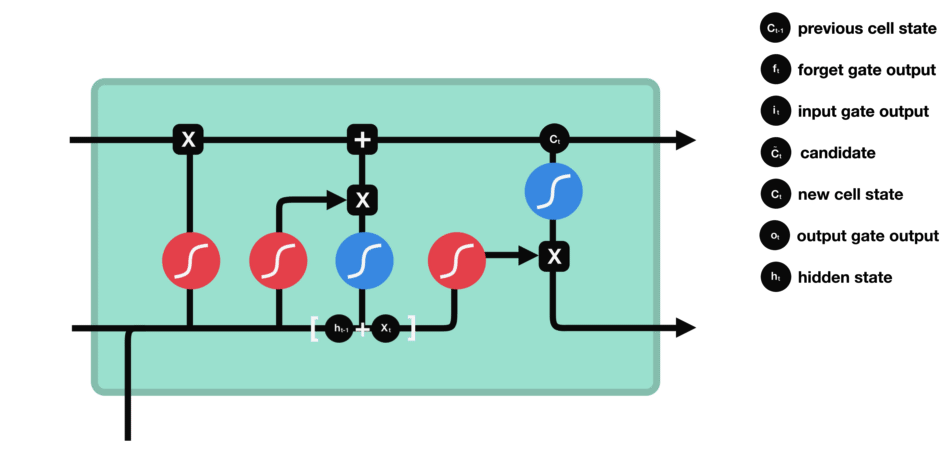

**Long Short Term Memory**

LSTMs has the advantage over RNNs in that they have gates that tells the cell which information to forget/hold onto instead of simply passing the data to the next cell. This allows the model to selectivly remember/forget things depending on their significance.

Read more about RNNs and LSTMs here: https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa



In [ ]:
model_lstm = tf.keras.Sequential(
    [
        tf.keras.layers.Input(
            [max_sequence]
        ),  # Input shape is equal to the padded sequences maximum length (i.e. max_sequence). Alternatively, this can be defined as a part of the Embedding layer
        # mask_zero is set to True to ignore the zero padding
        tf.keras.layers.Embedding(
            vocab_size + 1, 100, mask_zero=True
        ),  # Embedding layer with input dim of vocab_size + 1 (to account for paddings)
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

model_lstm.summary()

In [ ]:
model_lstm.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model_lstm.fit(train_dataset, epochs=3, validation_data=test_dataset)

#### Gated Recurrent Unit
Gated recurrent units are a gating mechanism in recurrent neural networks, introduced in 2014 by Kyunghyun Cho et al. The GRU is like a long short-term memory with a forget gate, but has fewer parameters than LSTM, as it lacks an output gate.

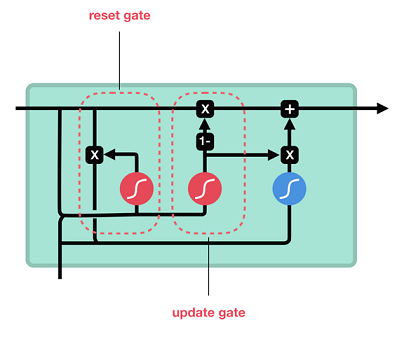

**GRU Gate** 


**Update Gate**<br>
The update gate acts similar to the forget and input gate of an LSTM. It decides what information to throw away and what new information to add.


**Reset Gate**<br>
The reset gate is another gate is used to decide how much past information to forget.
And that’s a GRU. GRU’s has fewer tensor operations; therefore, they are a little speedier to train then LSTM’s. There isn’t a clear winner which one is better. Researchers and engineers usually try both to determine which one works better for their use case.

In [ ]:
model_gru = tf.keras.Sequential(
    [
        tf.keras.layers.Input(
            [max_sequence]
        ),  # Input shape is equal to the padded sequences maximum length (i.e. max_sequence). Alternatively, this can be defined as a part of the Embedding layer
        # mask_zero is set to True to ignore the zero padding
        tf.keras.layers.Embedding(
            vocab_size + 1, 100, mask_zero=True
        ),  # Embedding layer with input dim of vocab_size + 1 (to account for paddings)
        tf.keras.layers.GRU(128),
        tf.keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

model_gru.summary()

In [ ]:
model_gru.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model_gru.fit(train_dataset, epochs=3, validation_data=test_dataset)

#### Bidirectional RNNs
A each time step, a regular recurrent layer only looks at past and present inputs
before generating its output. 

In other words, it is “causal,” meaning it cannot look into
the future. 

This type of RNN makes sense when forecasting time series, but for many
NLP tasks, such as Neural Machine Translation, it is often preferable to look ahead at
the next words before encoding a given word. 
For example, consider the phrases “the
Queen of the United Kingdom,” “the queen of hearts,” and “the queen bee”: to properly encode the word “queen,” you need to look ahead.

To implement this, run two recurrent layers on the same inputs, one reading the words from left to right and the other reading them from right to left. 
Then simply combine their outputs at each
time step, typically by concatenating them. 
This is called a bidirectional recurrent laye.

To implement a bidirectional recurrent layer in tensorflow, wrap a recurrent layer in a
`tf.keras.layers.Bidirectional` layer. 
For example, the following code creates a bidirectional LSTM layer:

`tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, return_sequences=True))`


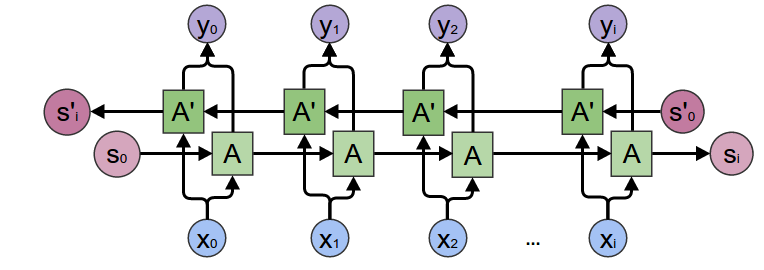


The Bidirectional layer will create a clone of the LSTM layer (but in
the reverse direction), and it will run both and concatenate their
outputs. So although the LSTM layer has 10 units, the Bidirectional
layer will output 20 values per time step. 




In [ ]:
model_bi_lstm = tf.keras.Sequential(
    [
        tf.keras.layers.Input(
            [max_sequence]
        ),  # Input shape is equal to the padded sequences maximum length (i.e. max_sequence). Alternatively, this can be defined as a part of the Embedding layer
        # mask_zero is set to True to ignore the zero padding
        tf.keras.layers.Embedding(
            vocab_size + 1, 100, mask_zero=True
        ),  # Embedding layer with input dim of vocab_size + 1 (to account for paddings)
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, return_sequences=False)),
        tf.keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

model_bi_lstm.summary()

In [ ]:
model_bi_lstm.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

In [ ]:
model_bi_lstm.fit(train_dataset, epochs=3, validation_data=test_dataset)

### Evaluation

In [ ]:
def predict(text):

    tokenized_texts = tokenizer.texts_to_sequences([text])
    input = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_texts, maxlen=max_sequence, padding="post"
    )

    output = model_bi_lstm.predict(input)[0][0]

    print("The Sentence: ", text)

    if output >= 0.5:
        print("Is Postive", output)
    else:
        print("Is Negative", output)

In [ ]:
text = "I am sad"  # @param {type: "string"}

predict(text)